<a href="https://colab.research.google.com/github/venidaydream/Intro_to_Big_Data/blob/main/big_data_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prediction model could be in addition to the foundational analysis of a company

In [71]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [ ]:
##detect outliers

In [ ]:
symbol = "AAPL"
start_date = "2018-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)
df = data[['Adj Close','Close']]
df.head()
ad_df=df["Adj Close"]

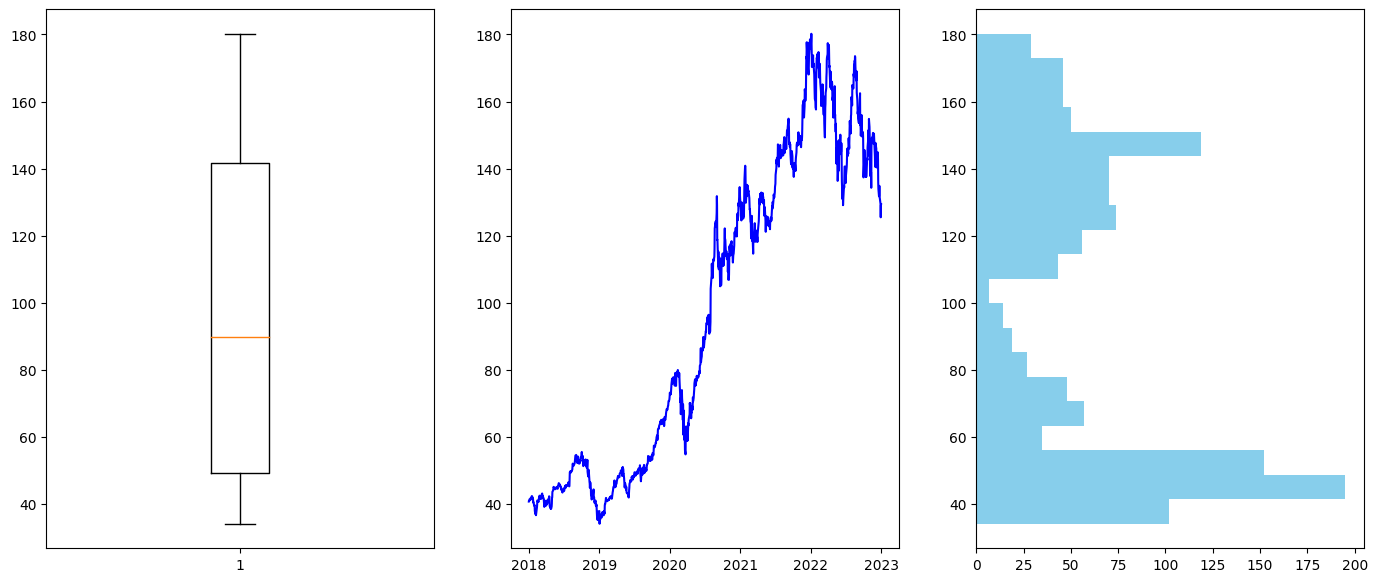

In [29]:
##subplots
fig, axs = plt.subplots(1, 3, figsize=(17, 7))

plt.subplot(131) # same as plt.subplot(1,2,1)
plt.boxplot(ad_df)

plt.subplot(132) # same as plt.subplot(1,2,2)
plt.plot(ad_df.index, ad_df.values, color='blue')

plt.subplot(133)
plt.hist(ad_df, bins=20,color='skyblue', orientation='horizontal')

plt.show() #to remove the text

In [ ]:
# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = ad_df.quantile(0.25)
Q3 = ad_df.quantile(0.75)

print(Q1)
# Calcular el IQR (Rango Intercuartil) Interquartile range - tells you the spread of the middle half of your distribution
#https://medium.com/analytics-vidhya/detecting-outliers-using-box-and-whisker-diagrams-and-iqr-346a1b9c0dbe
IQR = Q3 - Q1

# Definir los límites superior e inferior para identificar outliers
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR


# Filtrar los outliers
datos_filtrados = ad_df[(ad_df>= limite_inferior) & (ad_df <= limite_superior)]
print(f'my file has {ad_df.shape} records and the outliers are {datos_filtrados.shape } records, meaning there are no outliers')

In [ ]:
#to sell
to_sell = ad_df[(ad_df > limite_superior)]
to_sell.shape

In [ ]:
#to buy
to_buy = ad_df[(ad_df < limite_inferior)]
to_buy.shape
#type(to_buy) #pandas.core.series.Series

Splits

The primary purpose of a stock split is to reduce the share price, making it more affordable for a broader range of investors. It does not affect the overall market capitalization of the company.


In [ ]:
stock1=yf.Ticker(symbol)
print(stock1.history())

In [47]:
# Definir los símbolos de las acciones
#https://www.ig.com/en/trading-strategies/apple-stock-split-2020--what-you-need-to-know-230803
symbols = ["AAPL"]

# Crear un diccionario para almacenar información sobre los splits
splits_info = {}

# Iterar a través de los símbolos y obtener información sobre los splits
for symbol in symbols:
    stock = yf.Ticker(symbol)
    splits = stock.splits
    splits_info[symbol] = splits

# Imprimir información sobre los splits
for symbol, splits in splits_info.items():
    print(f"Splits para {symbol}:")
    print(splits)

Splits para AAPL:
Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64


In [52]:
symbols = "AAPL"
stock2 = yf.Ticker(symbols)
splits2 = stock2.splits
print(splits2)

Date
1987-06-16 00:00:00-04:00    2.0
2000-06-21 00:00:00-04:00    2.0
2005-02-28 00:00:00-05:00    2.0
2014-06-09 00:00:00-04:00    7.0
2020-08-31 00:00:00-04:00    4.0
Name: Stock Splits, dtype: float64


Get the proces on one of the split days

In [70]:
#df_split = data[['Adj Close','Open', 'Close']]
data.index
df_split = data[(data.index.day == 31) & (data.index.month == 8) & (data.index.year == 2020)]
#df_split_month = df_split[df_split.index.month == 8]
#df_split_year = df_split[df_split.index.year == 2020]
#set(df_split_day) & set(df_split_month) & set(df_split_year)
df_split.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-31,127.580002,131.0,126.0,129.039993,126.748947,225702700


Seasonality

Time series is a series of data points in which each data point is associated with a timestamp.

https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test??????????????


In [114]:
time_series = pd.Series(ad_df)
# Realizar la prueba ADF
resultado_adf = sm.tsa.adfuller(time_series)
# Extraer los resultados de la prueba ADF
adf_estadística, p_valor, lags, nobs, valores_críticos, regresión_estimada = resultado_adf
#type(resultado_adf) -> tuple
resultado_adf

(-1.0638032464769647,
 0.7292888687149068,
 11,
 1247,
 {'1%': -3.4356048614183443,
  '5%': -2.8638605461891617,
  '10%': -2.5680054872544145},
 5465.977441964695)

In [82]:
# Imprimir los resultados
print("Estadística ADF:", adf_estadística)
print("Valor p:", p_valor)
print("Valores críticos:", valores_críticos)

Estadística ADF: -1.0638032464769647
Valor p: 0.7292888687149068
Valores críticos: {'1%': -3.4356048614183443, '5%': -2.8638605461891617, '10%': -2.5680054872544145}


In [104]:
print('ADF Statistic: %f' % resultado_adf[0])
print('p-value: %f' % resultado_adf[1])
for key, value in resultado_adf[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.063803
p-value: 0.729289
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [108]:
def calculate_adf_statistic(stock_symbol, start_date, end_date):

    # Fetch historical stock data using yfinance
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)['Adj Close']

    # Calculate ADF statistic
    result = sm.tsa.adfuller(stock_data, autolag='AIC')

    adf_statistic = result[0]
    p_value = result[1]
    critical_values = result[4]

    # Prepare a dictionary to hold the results
    adf_results = {
        'ADF Statistic': adf_statistic,
        'p-value': p_value,
        '1%': critical_values['1%'],
        '5%': critical_values['5%'],
        '10%': critical_values['10%']
    }

    return adf_results

if __name__ == "__main__":
    # Input your stock symbol and date range
    stock_symbol = input("Enter the stock symbol (e.g., 'AAPL' for Apple Inc.): ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")

    # Calculate ADF statistic
    result = calculate_adf_statistic(stock_symbol, start_date, end_date)

    # Print the results
    for key, value in result.items():
        #print(f"{key}: {value}")
         print('\t%s: %.3f' % (key, value))

#p_valor>0.05 it's seasonal

Enter the stock symbol (e.g., 'AAPL' for Apple Inc.): AAPL
Enter the start date (YYYY-MM-DD): 2018-01-01
Enter the end date (YYYY-MM-DD): 2023-01-01
[*********************100%%**********************]  1 of 1 completed
	ADF Statistic: -1.064
	p-value: 0.729
	1%: -3.436
	5%: -2.864
	10%: -2.568


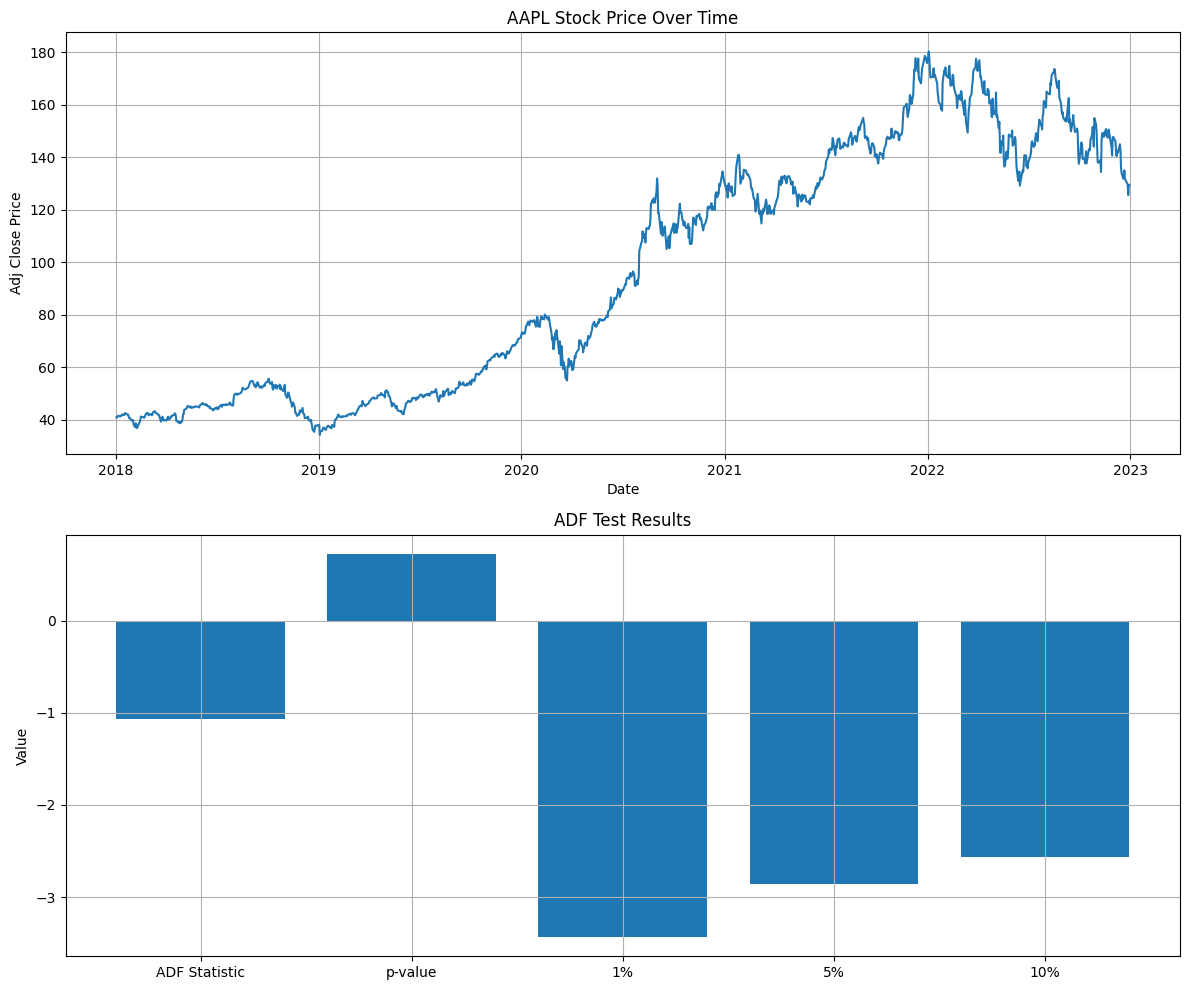

In [119]:
# Create a subplot with two rows (1 for the time series plot, 1 for the ADF statistics)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the time series data
ax1.plot(stock_data)
ax1.set_title(f"{stock_symbol} Stock Price Over Time")
ax1.set_xlabel("Date")
ax1.set_ylabel("Adj Close Price")
ax1.grid(True)

# Plot the ADF statistic
ax2.bar(result.keys(), result.values())
ax2.set_title("ADF Test Results")
ax2.set_ylabel("Value")
ax2.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()